# Challenge #

Let's say that we are interested in predicting whether or not a student will pass an exam based on the number of hours they studied and the number of hours they slept the night before the exam. The outcome variable is "Pass" (1 = yes, 0 = no). The goal of logistic regression in this case would be to find a relationship between the hours studied and slept, and the likelihood of passing the exam.

Build and evaluate the logistic regression model. Make a prediction for a new student who studied for 7 hours and slept 8 hours.

***Will they pass or fail?***

# Part 1 - Exploring the data and building the model

In [61]:
# Import the required packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import sklearn.metrics as metrics
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv("../csv files/student_pass.csv")

Use EDA to familiarise yourself with the data (shape of the data, basic summary, correlation etc.)

In [62]:
df.describe()

,Student,Hours_Studied,Hours_Slept,Pass
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,5.121000,7.079000,0.530000
std,29.011492,2.025808,1.034779,0.501614
min,1.000000,0.000000,4.800000,0.000000
25%,25.750000,3.700000,6.300000,0.000000
50%,50.500000,5.150000,7.000000,1.000000
75%,75.250000,6.500000,7.825000,1.000000
max,100.000000,9.500000,9.400000,1.000000


In [63]:
df.head()

,Student,Hours_Studied,Hours_Slept,Pass
0,1,8.5,8.9,1
1,2,5.8,5.7,0
2,3,7.0,5.7,0
3,4,9.5,8.0,1
4,5,8.7,5.8,1


In [64]:
df.tail()

,Student,Hours_Studied,Hours_Slept,Pass
95,96,6.4,6.8,1
96,97,5.0,7.8,1
97,98,8.6,7.8,1
98,99,5.3,9.2,1
99,100,5.8,8.3,1


In [65]:
df.shape

(100, 4)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Student        100 non-null    int64  
 1   Hours_Studied  100 non-null    float64
 2   Hours_Slept    100 non-null    float64
 3   Pass           100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [67]:
df.count().isnull()

Student          False
Hours_Studied    False
Hours_Slept      False
Pass             False
dtype: bool

In [68]:
df.columns

Index(['Student', 'Hours_Studied', 'Hours_Slept', 'Pass'], dtype='object')

## Exploring the Data through Scattergram, Histogram and Jointplot
___

Text(0, 0.5, 'Pass')

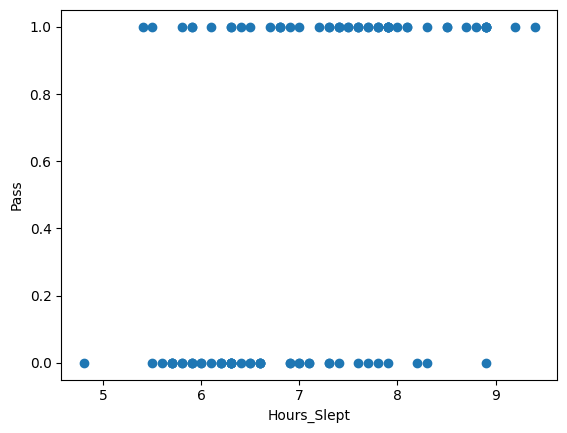

In [69]:
# Inspect the relationship between individual independent variables and the dependent variable
plt.scatter(
    df['Hours_Slept'],
    df['Pass']
)
plt.xlabel('Hours_Slept')
plt.ylabel('Pass')

Text(0, 0.5, 'Pass')

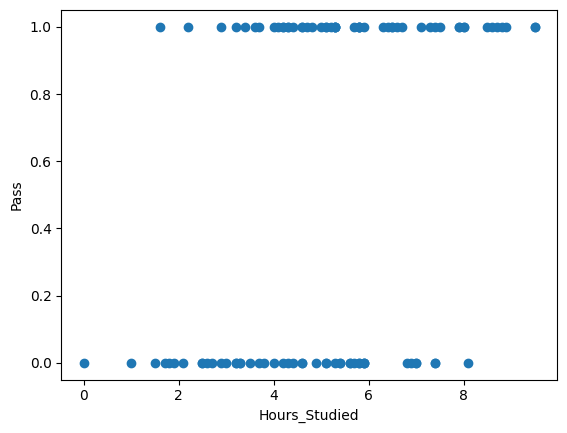

In [70]:
# Inspect the relationship between individual independent variables and the dependent variable
plt.scatter(
    df['Hours_Studied'],
    df['Pass']
)
plt.xlabel('Hours_Studied')
plt.ylabel('Pass')

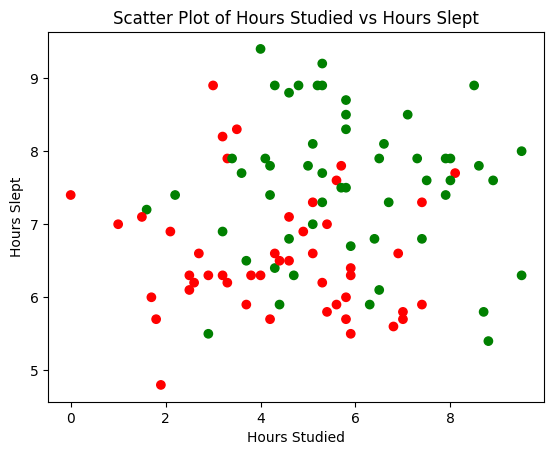

In [71]:
# Inspect the relationship between both independent variables and the dependent variable
pass_color = 'green'
fail_color = 'red'

plt.scatter(
    df['Hours_Studied'],
    df['Hours_Slept'],
    c=df['Pass'].map({1: pass_color, 0: fail_color})
)
plt.xlabel('Hours Studied')
plt.ylabel('Hours Slept')
plt.title("Scatter Plot of Hours Studied vs Hours Slept")
plt.show()

### Histogram of Hours Studied

Histograms can be useful for visualising the distribution of a single numerical value. I will use a histogram to view the hours studied in order to see the number of students for the different values of hours studied.

Text(0.5, 1.0, 'Histogram of Hours Studied')

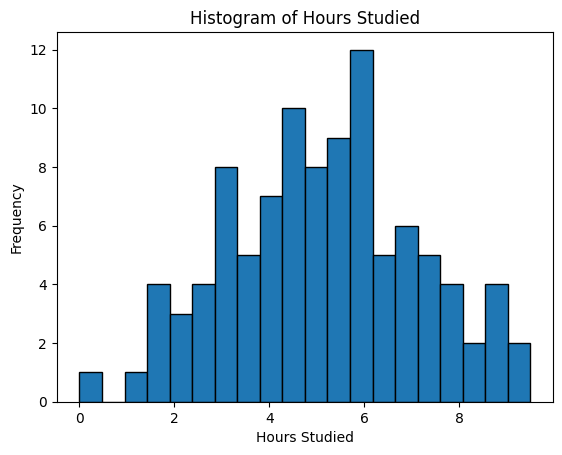

In [72]:
df['Hours_Studied'].plot.hist(bins=20, edgecolor='black')
plt.xlabel('Hours Studied')
plt.title("Histogram of Hours Studied")

### Joint plot of Hours studied and Hours slept

A joint plot combines a scatter plot and two histograms. It is useful for visualising the relationship between two numerical variables and how each is distributed.

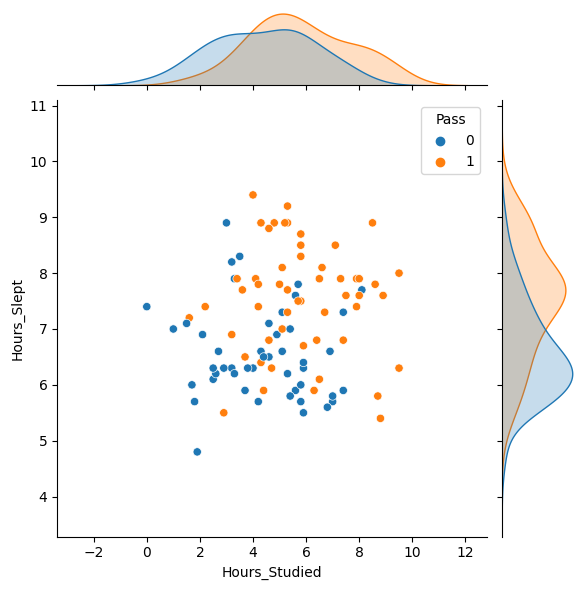

In [73]:
sns.jointplot(x='Hours_Studied', y='Hours_Slept', hue='Pass', data=df)

The 'hue' parameter I've added in the above code is so that I can differentiate the pass and fail outcome by color.

### Pairplot with hue defined by 'Pass'

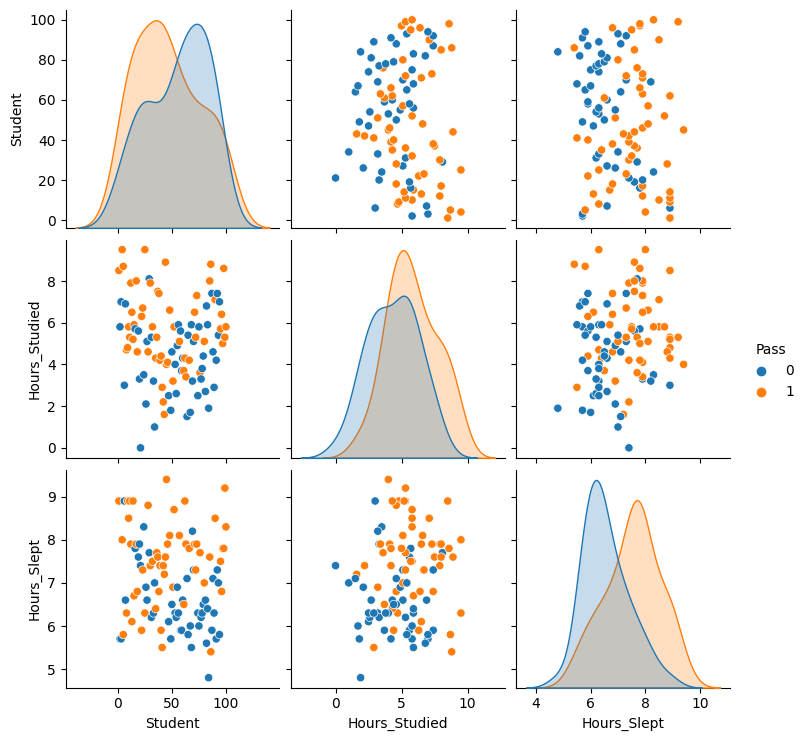

In [74]:
sns.pairplot(df, hue='Pass')

## Split the DataFrame into train and test data
---

In [75]:
train, test = train_test_split(
    df,
    random_state = 13 # this ensures that we get the same answer each time
)

In [76]:
train, test

(    Student  Hours_Studied  Hours_Slept  Pass
 59       60            4.3          6.6     0
 93       94            7.0          5.8     0
 96       97            5.0          7.8     1
 89       90            7.1          8.5     1
 47       48            6.6          8.1     1
 ..      ...            ...          ...   ...
 25       26            2.1          6.9     0
 16       17            8.0          7.9     1
 74       75            5.8          6.0     0
 48       49            1.8          5.7     0
 82       83            5.9          6.4     0
 
 [75 rows x 4 columns],
     Student  Hours_Studied  Hours_Slept  Pass
 37       38            7.4          6.8     1
 62       63            3.4          7.9     1
 83       84            1.9          4.8     0
 14       15            5.9          6.7     1
 43       44            8.9          7.6     1
 9        10            5.8          8.5     1
 44       45            4.0          9.4     1
 31       32            5.8       

## Train the model
---

In [77]:
# Identify dependent and independent variables

dependent_var = train['Pass']
independent_vars = train[['Hours_Studied', 'Hours_Slept']]
independent_vars = sm.add_constant(independent_vars)

# Build the model

model = sm.Logit(
    dependent_var,
    independent_vars
).fit()

Optimization terminated successfully.
         Current function value: 0.505466
         Iterations 6


In [78]:
df[['Hours_Studied', 'Hours_Slept']]

,Hours_Studied,Hours_Slept
0,8.5,8.9
1,5.8,5.7
2,7.0,5.7
3,9.5,8.0
4,8.7,5.8
...,...,...
95,6.4,6.8
96,5.0,7.8
97,8.6,7.8
98,5.3,9.2


In [79]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Pass   No. Observations:                   75
Model:                          Logit   Df Residuals:                       72
Method:                           MLE   Df Model:                            2
Date:                Mon, 19 Jun 2023   Pseudo R-squ.:                  0.2699
Time:                        14:14:33   Log-Likelihood:                -37.910
converged:                       True   LL-Null:                       -51.926
Covariance Type:            nonrobust   LLR p-value:                 8.183e-07
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -10.4435      2.443     -4.275      0.000     -15.231      -5.656
Hours_Studied     0.3491      0.164      2.125      0.034       0.027       0.671
Hours_Slept       1.2519      0.321      3.903      0.000       0.623       1.881
=================================================================================
"""

## Logit function
---

### Is the model a good fit?

We will use the Logit Regression results to answer this question:
- **coef** : the coefficients of the independent variables in the regression equation.
<br>
- **Log-Likelihood** : the natural logarithm of the Maximum Likelihood Estimation(MLE) function. MLE is the optimization process of finding the set of parameters that result in the best fit. 
    - A higher (non-negative) number is better, but does not soley represent 'goodness of fit'. The log likelihood of this model is a negative but this is not concerning at the moment.
<br>
- **LL-Null** : the value of log-likelihood of the model when no independent variable is included(only an intercept is included).
     - In general, a larger LL-Null value indicates a worse fit, while a smaller value indicates a better fit. But the meaningful interpretation lies in comparing the LL-Null value to the log-likelihood values of other models being considered.
<br>
- **Pseudo R-squ.** : a substitute for the R-squared value in Least Squares linear regression. It is the ratio of the log-likelihood of the null model to that of the full model.
     - These R-squared measures provide an indication of how much of the variation in the response variable is explained by the model. 
     - Our pseudo r-squared value of 0.53 suggests that the logistic regression model has a reasonably good fit and explains approx 53% of the variation in the dependent variable, given the independent variables in the model

## Predict data for the test set and compare
---

In [80]:
# Predict the model results on the test data

predicted = model.predict(
    sm.add_constant(test[['Hours_Studied', 'Hours_Slept']])
)

In [81]:
predicted.head()

37    0.657570
62    0.653231
83    0.022507
14    0.500922
43    0.898220
dtype: float64

In [82]:
test['Pass'].head()

37    1
62    1
83    0
14    1
43    1
Name: Pass, dtype: int64

# Part 2 - Model Validation

## Validating our model
---
Validating a logistic regression model involves assessing how well the model fits the data and how well it can predict outcomes for new data. Here are some common methods for model validation:
- Confusion Matrix, True Positive and True Negative Rate
- Area Under the Curve (AUC)
- Receiver Operating Characteristic curve (ROC)

### Confusion Matrix

In [83]:
# We use 0.5 as the threshold
predicted_labels = predicted > 0.5  

# Generate confusion matrix
cm = metrics.confusion_matrix(test['Pass'], predicted_labels)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 6  5]
 [ 4 10]]


### True Positive Rate and True Negative Rate

In [84]:
# Calculate TPR and TNR
TN, FP, FN, TP = cm.ravel()

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
print(TN)
print(FN)
print(FP)
print(TP)
print(f"True Positive Rate (TPR): {TPR}")
print(f"True Negative Rate (TNR): {TNR}")

6
4
5
10
True Positive Rate (TPR): 0.7142857142857143
True Negative Rate (TNR): 0.5454545454545454


### AUC score

In [85]:
# Calculate the AUC Score

metrics.roc_auc_score(test['Pass'],predicted)

0.7857142857142857

### ROC curve

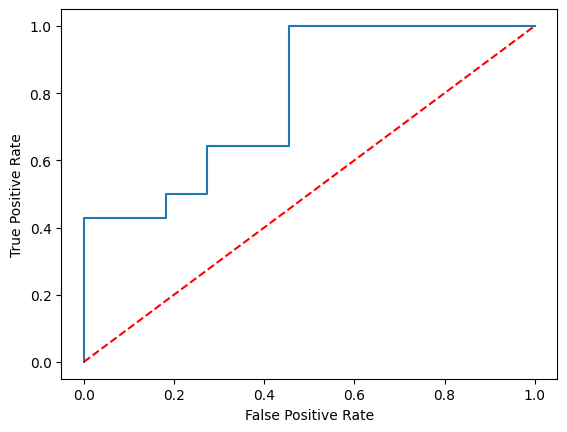

In [86]:
# Plot the ROC Curve

fpr, tpr, _ = metrics.roc_curve(test['Pass'],predicted)

plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Making a prediction
---

In [87]:
# Make a prediction for a new student who studied for 7 hours and slept 8 hours. Will they pass or fail?
new_data = [[1, 7, 8]]  

# Make the prediction
predicted_values = model.predict(sm.add_constant(new_data))
print(predicted_values[0])

if predicted_values[0] >= 0.5:
    print("The student will pass")
else: 
    print("The student will fail")


0.8823753980211198
The student will pass
